<a href="https://colab.research.google.com/github/dantepawn/data_viz/blob/master/covi19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas

In [0]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime 

# Data

In [0]:
days = ['06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

In [0]:
def create_df(days):
  '''for each day in days collect the data''' 
  df = pd.DataFrame()

  for i in days:
    url =  'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-202003{}.csv'.format(i)
  #df.append(pd.read_csv(url, encoding= 'Latin'))
    df = pd.concat([df,pd.read_csv(url, encoding="Latin")])
    df.data = pd.to_datetime(df.data , yearfirst=True)
    df = df[df['codice_provincia'].map(lambda x :len(str(x)) < 3)]
    #rename regions
    df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Bolzano', 'Trentino-Alto Adige')
    df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Trento', 'Trentino-Alto Adige')
  return df


In [0]:
#region shape json file
regioni_url = 'https://gist.github.com/datajournalism-it/48e29e7c87dca7eb1d29/raw/2636aeef92ba0770a073424853f37690064eb0ea/regioni.geojson'
regioni = gpd.read_file(regioni_url)
regioni.rename(columns={'NOME_REG':'denominazione_regione'},inplace=True)

In [94]:
df = create_df(days)
df.shape

(2574, 12)

In [95]:
df.head()

data stato  codice_regione  ... totale_casi  note_it note_en
0 2020-03-06 18:00:00   ITA              13  ...         3.0      NaN     NaN
1 2020-03-06 18:00:00   ITA              13  ...         1.0      NaN     NaN
2 2020-03-06 18:00:00   ITA              13  ...         1.0      NaN     NaN
3 2020-03-06 18:00:00   ITA              13  ...         4.0      NaN     NaN
5 2020-03-06 18:00:00   ITA              17  ...         1.0      NaN     NaN

[5 rows x 12 columns]

merge with each region shape

In [0]:
#merge df with regions to include the geo
gdf = df.merge(regioni , on = ['denominazione_regione'])

In [0]:
gdf.set_index('data',inplace=True)


In [98]:
gdf.head(2)

stato  ...                                           geometry
data                       ...                                                   
2020-03-06 18:00:00   ITA  ...  MULTIPOLYGON (((13.92027 42.89005, 13.92045 42...
2020-03-06 18:00:00   ITA  ...  MULTIPOLYGON (((13.92027 42.89005, 13.92045 42...

[2 rows x 12 columns]

In [0]:
df.reset_index().totale_casi

0          3
1          1
2          1
3          4
4          4
        ... 
2155     125
2156    1402
2157    1067
2158    1876
2159    1104
Name: totale_casi, Length: 2160, dtype: object

In [0]:
#example case
df_cases = df[(df['denominazione_provincia'] == 'Roma') | 
   (df['denominazione_provincia'] == 'Bergamo') | 
   (df['denominazione_provincia'] == 'Milano') |
   (df['denominazione_provincia'] == 'Bologna')|
   (df['denominazione_provincia'] == 'Catania')] 


In [106]:
df_cases.shape

(130, 12)

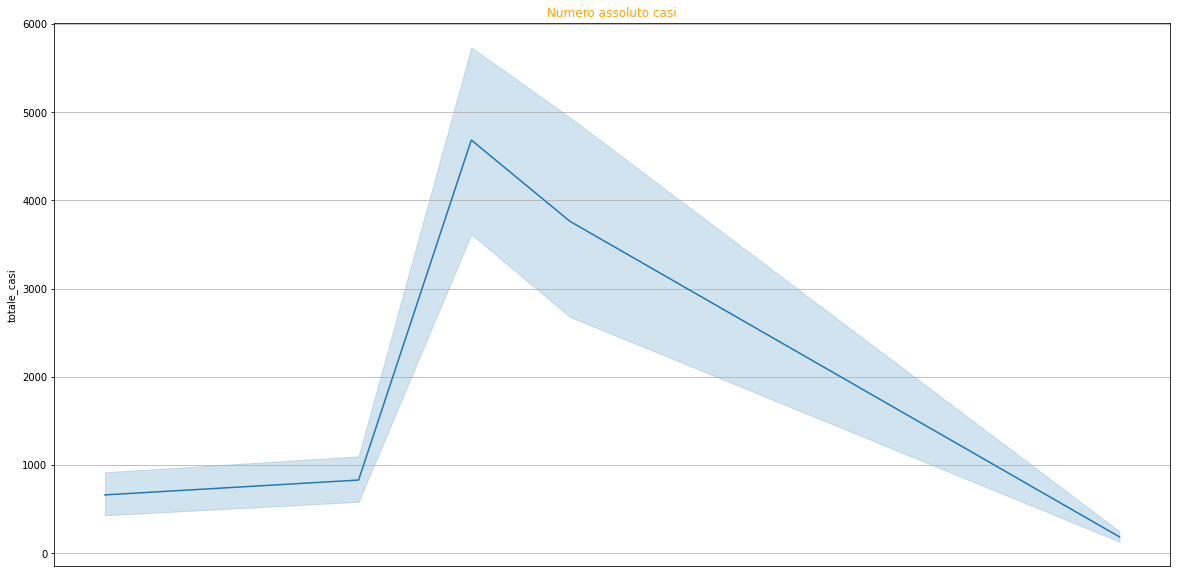

In [110]:
citta = ['Roma','Milano','Bergamo','Catania','Bologna']
plt.figure(figsize = (20,10))
plt.title('Numero assoluto casi', color = 'orange')
plt.xticks([])
  #plt.title(citta[i-1], color = 'orange')
plt.grid(axis = 'y')
sn.lineplot(x = df_cases.index , y = 'totale_casi'   , data = df_cases , legend='full')

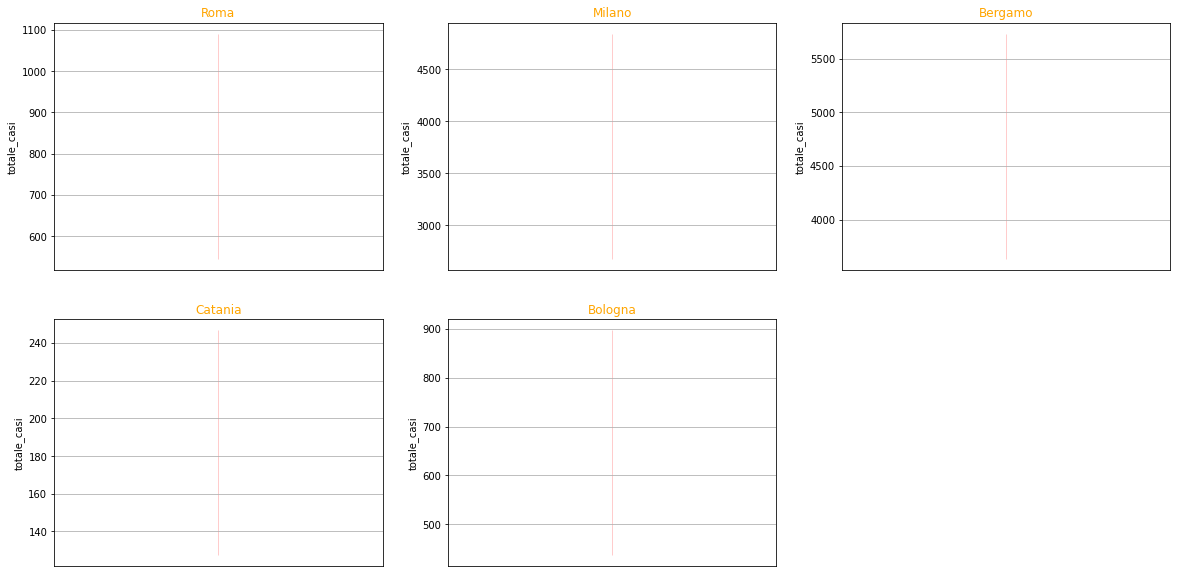

In [104]:
citta = ['Roma','Milano','Bergamo','Catania','Bologna']
plt.figure(figsize = (20,10))
plt.title('Numero assoluto casi', color = 'orange')

for i in range(1,len(citta)+1):
  plt.subplot(2,3,i)
  data= df[df['denominazione_provincia'] == citta[i-1] ] 
  plt.xticks([])
  plt.title(citta[i-1], color = 'orange')
  plt.grid(axis = 'y')
  
  sn.lineplot(x = data.index , y = 'totale_casi' , data = data ,color= 'red', legend='full')

In [0]:
total = []
for d in days :
  total.append(df['2020-03-{}'.format(d)].totale_casi.sum())


In [0]:
dd = pd.date_range('2020-3-6' , periods = len(days))

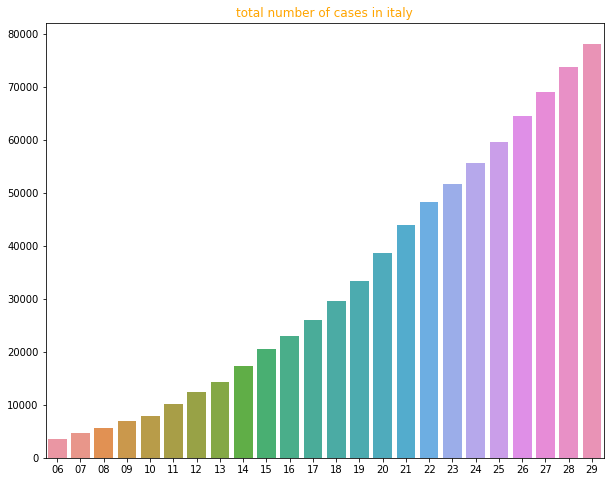

In [0]:
plt.figure(figsize=(10,8))
plt.title('total number of cases in italy' , color = 'orange')
sn.barplot(x = days  , y = total )

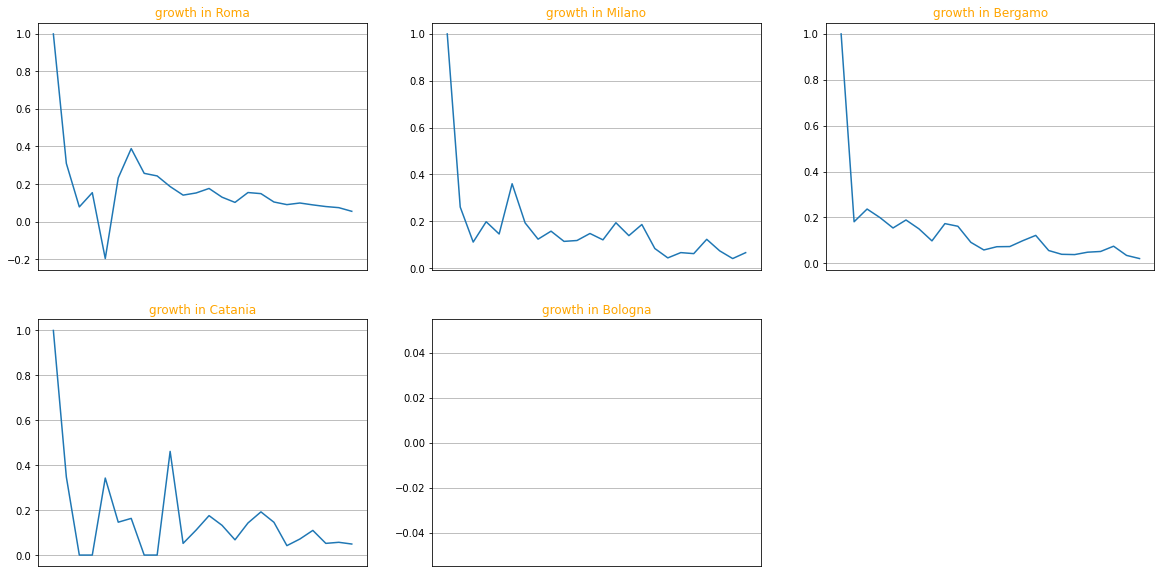

In [0]:
plt.figure(figsize = (20,10))

for i in range(0,len(citta)):
  plt.subplot(2,3,i+1)
  data= df[df['denominazione_provincia'] == citta[i] ] 
  
  numbers = data.totale_casi.values
  np.set_printoptions(suppress= True)
  perc = (numbers - np.pad(numbers, 1)[:-2])/numbers
  plt.title('growth in {}'.format(citta[i]), color = 'orange')
  plt.grid(which = 'major',axis = 'y', )
  plt.xticks([])
  plt.plot(perc)

In [0]:
import folium
base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )


In [0]:
from folium.plugins import  HeatMap


In [0]:
df.head(2)

data stato  codice_regione  ... totale_casi  note_it note_en
0 2020-03-06 18:00:00   ITA              13  ...         3.0      NaN     NaN
1 2020-03-06 18:00:00   ITA              13  ...         1.0      NaN     NaN

[2 rows x 12 columns]

In [0]:
when = '2020-03-30'
base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
for i , row in df[when].iterrows():
  folium.Circle(location=(row.lat,row.long) , radius = row.totale_casi*10 , color = 'green' ,fill = True  ).add_to(base)

KeyError: ignored

In [0]:
base


# Plot by regions

In [0]:
df[when].denominazione_regione.unique()

NameError: ignored

In [0]:
len(df[when].denominazione_regione.unique()) , len(regioni.NOME_REG)

(21, 20)

In [0]:
#df = df.where(df['denominazione_regione'].any( ['P.A. Bolzano' , 'P.A. Trento']),other ='Trentino-Alto Adige' ) 


In [0]:
df.columns

Index(['stato', 'codice_regione', 'denominazione_regione', 'codice_provincia',
       'denominazione_provincia', 'sigla_provincia', 'lat', 'long',
       'totale_casi', 'note_it', 'note_en', 'geometry'],
      dtype='object')

In [0]:
df_grouped = df.groupby(['data','denominazione_regione'])['totale_casi'].sum()
df_grouped

data                 denominazione_regione
2020-03-06 18:00:00  Abruzzo                     9.0
                     Basilicata                  3.0
                     Calabria                    4.0
                     Campania                   17.0
                     Emilia-Romagna            870.0
                                               ...  
2020-03-31 17:00:00  Toscana                  4350.0
                     Trentino-Alto Adige      3117.0
                     Umbria                   1043.0
                     Valle d'Aosta             628.0
                     Veneto                   8876.0
Name: totale_casi, Length: 520, dtype: float64

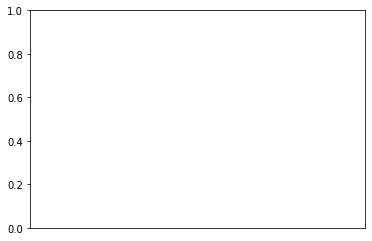

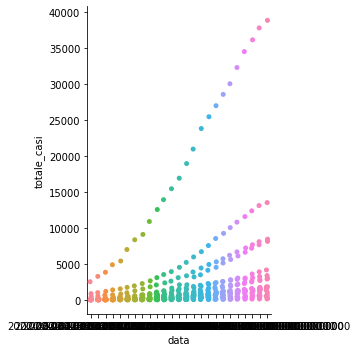

In [0]:
sn.catplot(x='data',y = 'totale_casi',data= df_grouped.reset_index())# dfgrouped

In [0]:
df_grouped.reset_index().set_index('data')['2020-03-27']

denominazione_regione  totale_casi
data                                                   
2020-03-27 17:00:00                Abruzzo       1017.0
2020-03-27 17:00:00             Basilicata        151.0
2020-03-27 17:00:00               Calabria        383.0
2020-03-27 17:00:00               Campania       1354.0
2020-03-27 17:00:00         Emilia-Romagna      11588.0
2020-03-27 17:00:00  Friuli Venezia Giulia       1309.0
2020-03-27 17:00:00                  Lazio       2273.0
2020-03-27 17:00:00                Liguria       1467.0
2020-03-27 17:00:00              Lombardia      34545.0
2020-03-27 17:00:00                 Marche       2909.0
2020-03-27 17:00:00                 Molise        100.0
2020-03-27 17:00:00               Piemonte       6622.0
2020-03-27 17:00:00                 Puglia       1187.0
2020-03-27 17:00:00               Sardegna        480.0
2020-03-27 17:00:00                Sicilia       1250.0
2020-03-27 17:00:00                Toscana       3036.0
2020-03-27 17:00:00    Trentino-Alto Adige       2394.0
2020-03-27 17:00:00                 Umbria        853.0
2020-03-27 17:00:00          Valle d'Aosta        452.0
2020-03-27 17:00:00                 Veneto       7218.0

In [0]:
df_target = df_grouped.reset_index().set_index('data')['2020-03-29']
df_target = pd.DataFrame(df_target)

In [0]:
df_target.set_index('denominazione_regione')

totale_casi
denominazione_regione             
Abruzzo                     1293.0
Basilicata                   202.0
Calabria                     483.0
Campania                    1647.0
Emilia-Romagna             13119.0
Friuli Venezia Giulia       1471.0
Lazio                       2691.0
Liguria                     1732.0
Lombardia                  37841.0
Marche                      3251.0
Molise                       117.0
Piemonte                    7666.0
Puglia                      1385.0
Sardegna                     583.0
Sicilia                     1460.0
Toscana                     3901.0
Trentino-Alto Adige         2808.0
Umbria                       993.0
Valle d'Aosta                584.0
Veneto                      8094.0

In [0]:
#check all the region names correspond 
for v in df_target.denominazione_regione:
  if v in regioni.denominazione_regione.values :
    print(True)
  else:
    print(False)  


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [0]:
regioni.denominazione_regione

0                  Piemonte
1             Valle d'Aosta
2                 Lombardia
3       Trentino-Alto Adige
4                    Veneto
5     Friuli Venezia Giulia
6                   Liguria
7            Emilia-Romagna
8                   Toscana
9                    Umbria
10                   Marche
11                    Lazio
12                  Abruzzo
13                   Molise
14                 Campania
15                   Puglia
16               Basilicata
17                 Calabria
18                  Sicilia
19                 Sardegna
Name: denominazione_regione, dtype: object

In [0]:
bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [0]:
bins

[100.0, 666.5, 1309.0, 2651.5, 34545.0]

In [0]:
#help(folium.Choropleth)

In [0]:
base = folium.Map(location= (41.9028, 12.4964) , zoom_start = 6 )
#base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
#bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))



folium.Choropleth(
    geo_data = regioni.__geo_interface__,
    name = 'choropleth',
    data = df_target,
    columns = ['denominazione_regione','totale_casi'] ,
    key_on ='feature.denominazione_regione',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Casi Totali',
    
    
).add_to(base)

folium.LayerControl().add_to(base)

base

In [0]:
series_target = df_target.set_index('denominazione_regione')

In [0]:
series_target.iloc[:,0]

denominazione_regione
Abruzzo                   1293.0
Basilicata                 202.0
Calabria                   483.0
Campania                  1647.0
Emilia-Romagna           13119.0
Friuli Venezia Giulia     1471.0
Lazio                     2691.0
Liguria                   1732.0
Lombardia                37841.0
Marche                    3251.0
Molise                     117.0
Piemonte                  7666.0
Puglia                    1385.0
Sardegna                   583.0
Sicilia                   1460.0
Toscana                   3901.0
Trentino-Alto Adige       2808.0
Umbria                     993.0
Valle d'Aosta              584.0
Veneto                    8094.0
Name: totale_casi, dtype: float64

In [119]:
base = folium.Map(location= (41.9028, 12.4964) , zoom_start = 6 )
#base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
#bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))



folium.Choropleth(
    geo_data = regioni.__geo_interface__,
    name = 'choropleth',
    data = series_target.iloc[:,0],
    #columns = ['denominazione_regione','totale_casi'] ,
    key_on ='feature.denominazione_regione',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Casi Totali',
    
    
).add_to(base)

folium.LayerControl().add_to(base)

#base

# try with geopandas

In [0]:
gdf = gdf.set_index('data')

In [0]:
#taday is automatically set to yesteda
yesterday = datetime.date.today() -datetime.timedelta(1)
#gdf[str(today)]

def region_plot(day = yesterday):
  gdf_reg=gdf.groupby(['denominazione_regione'])['totale_casi'].sum()
  gdf_reg = regioni.merge(gdf_reg , on ='denominazione_regione')
  gdf_reg.plot(column = 'totale_casi' , cmap = 'inferno' , figsize = (8,10))



ERROR! Session/line number was not unique in database. History logging moved to new session 60


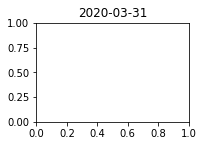

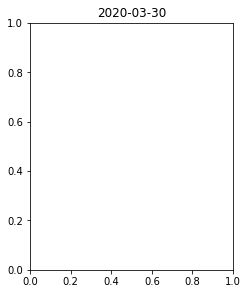

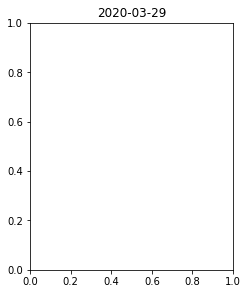

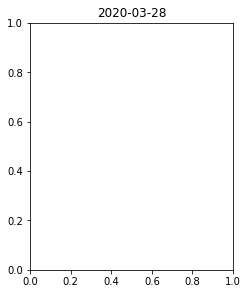

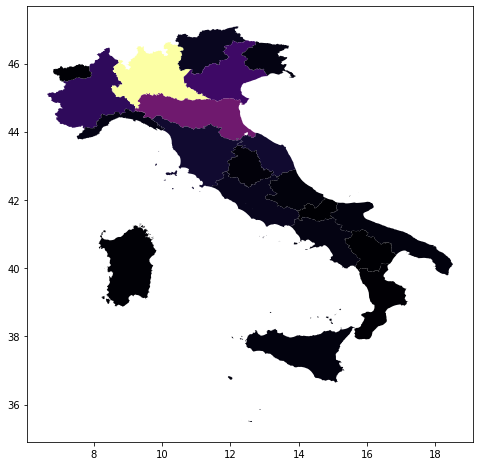

In [165]:
for i in range(1,5):
  
  plt.subplot(2,2,i)
  plt.title(datetime.date.today()-datetime.timedelta(i))
  region_plot(str(datetime.date.today()-datetime.timedelta(i+1)))

# Global trend

In [0]:
global_death_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
#gpd.read_file(global_url)

In [0]:
global_death_df  = pd.read_csv(global_death_url)
global_confirmed_df  = pd.read_csv(global_confirmed_url)
global_recovered_df  = pd.read_csv(global_recovered_url)


In [0]:
global_death_df[global_death_df['Country/Region']=='Italy']
#global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0]
#global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0]
#global_url[global_df['Country/Region']=='Italy']

Province/State Country/Region   Lat  ...  3/29/20  3/30/20  3/31/20
137            NaN          Italy  43.0  ...    10779    11591    12428

[1 rows x 74 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


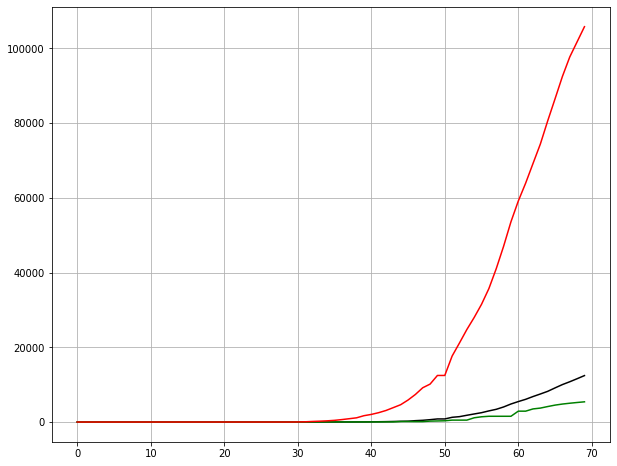

In [0]:
plt.figure(figsize = (10,8))
plt.plot(global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'black' ,  )
plt.plot(global_recovered_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'green')
plt.plot(global_confirmed_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'red')
plt.grid()